# 2주차 과제 60191095 강하연
출처 : https://www.kaggle.com/blastchar/telco-customer-churn

## 통신사 고객 이탈 데이터

In [1]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('/Users/hayeon/Downloads/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
import matplotlib.pyplot as plt

In [14]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [26]:
fig = px.histogram(df, x='Churn',
                  title='<b>고객 이탈 분포<b>')
fig.update_layout(width=600, height=450, bargap=0.1)
fig.show()

- 이탈하지 않은 고객이 더 많다.

In [25]:
fig = px.histogram(df, x='Churn', color='gender', barmode='group',
                  title='<b>고객 성별 분포<b>')
fig.update_layout(width=600, height=450, bargap=0.1)
fig.show()

- 성별 분포는 이탈 여부에 상관없이 비슷하다

In [28]:
fig = px.histogram(df, x='Churn', color='StreamingTV', barmode='group',
                  title='<b>고객 TV스트리밍 제공여부 분포<b>')
fig.update_layout(width=600, height=450, bargap=0.1)
fig.show()

#### 이탈하지 않은 고객 중 Yes / No / No internet service에 따른 이탈 비율

In [50]:
a = ('Yes', 'No', 'No internet service')

In [69]:
for i, name in enumerate(a):
    print(name, ': %.2f'%(df[df['Churn']=='No']['StreamingTV'].value_counts()[i]/len(df[df['Churn']=='No']['StreamingTV'])))

Yes : 0.37
No : 0.36
No internet service : 0.27


#### 이탈한 고객 중 Yes / No / No internet service에 따른 이탈 비율

In [71]:
for i, name in enumerate(a):
    print(name, ': %.2f'%(df[df['Churn']=='Yes']['StreamingTV'].value_counts()[i]/len(df[df['Churn']=='Yes']['StreamingTV'])))

Yes : 0.50
No : 0.44
No internet service : 0.06


- 이탈한 고객이라면, 인터넷 서비스를 제공받지 않아서 이탈했을 것 같다고 생각했지만 오히려 제공받지 않은 고객의 이탈 비율이 극히 낮았다

In [76]:
fig = px.histogram(df, x='Churn', color='PaymentMethod', barmode='group',
                  title='<b>고객 비용지불방법 분포<b>')
fig.update_layout(width=600, height=450, bargap=0.1)
fig.show()

- 이탈한 고객 중 Electronic Check로 비용을 지불한 고객이 가장 많았다

In [77]:
fig = px.histogram(df, x='Churn', color='Dependents', barmode='group',
                  title='<b>고객 자녀 여부 분포<b>')
fig.update_layout(width=600, height=450, bargap=0.1)
fig.show()

- 라벨이 불균형하다는 점을 고려했을 때, 위 분포는 크게 의미가 없다. 

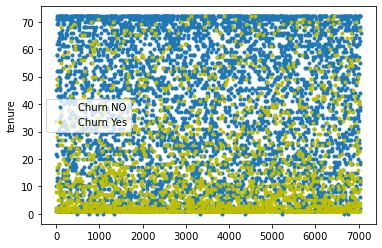

In [87]:
plt.plot(df[df['Churn']=='No']['tenure'], '.', label='Churn NO')
plt.plot(df[df['Churn']=='Yes']['tenure'], 'y.', label='Churn Yes')
plt.ylabel('tenure')
plt.legend()
plt.show()

- 이탈하지 않는 고개들은 계약유지기간이 상대적으로 길다
- 이탈한 고객들은 계약유지기간이 상대적으로 짧다.

### **=> 계약기간이 길수록 이탈하지 않을 가능성이 높다**